**first step**
Drive ko mount krna hai**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

ValueError: mount failed

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In [ ]:
import numpy as np
np.__version__

'1.25.2'

In [ ]:
import pandas as pd
pd.__version__

'2.0.3'

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping as ES
from IPython.display import clear_output as cls


import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
batchSize = 32
imageShape = (224, 224)
epochs = 10
channels = 3

In [ ]:
train_dir =  '../content/drive/My Drive/tomotodatasetcode/train/'





val_dir =  '../content/drive/My Drive/tomotodatasetcode/val/'

In [ ]:
class_names = sorted(os.listdir(train_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
class_dis

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [ ]:
fig = px.pie(names=class_names, values=class_dis, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255.), validation_split=0.2)
val_gen = ImageDataGenerator(rescale=(1./255.))

In [ ]:
train_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='training', class_mode='categorical')
val_ds = train_gen.flow_from_directory(train_dir,target_size=imageShape,batch_size=batchSize, subset='validation', class_mode='categorical')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
test_ds = val_gen.flow_from_directory(val_dir,target_size=imageShape,batch_size=batchSize, class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [ ]:

def plot_images(data, class_names):

    r, c = 3, 4
    imgLen = r*c

    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):


        id = np.random.randint(len(images))
#         img = images[id].numpy().astype('uint8')
        img = tf.expand_dims(images[id], axis=0)
        lab = class_names[np.argmax(labels[id])]

        plt.subplot(r, c, i)
        plt.imshow(img[0])
        plt.title(lab)
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break
    plt.show()

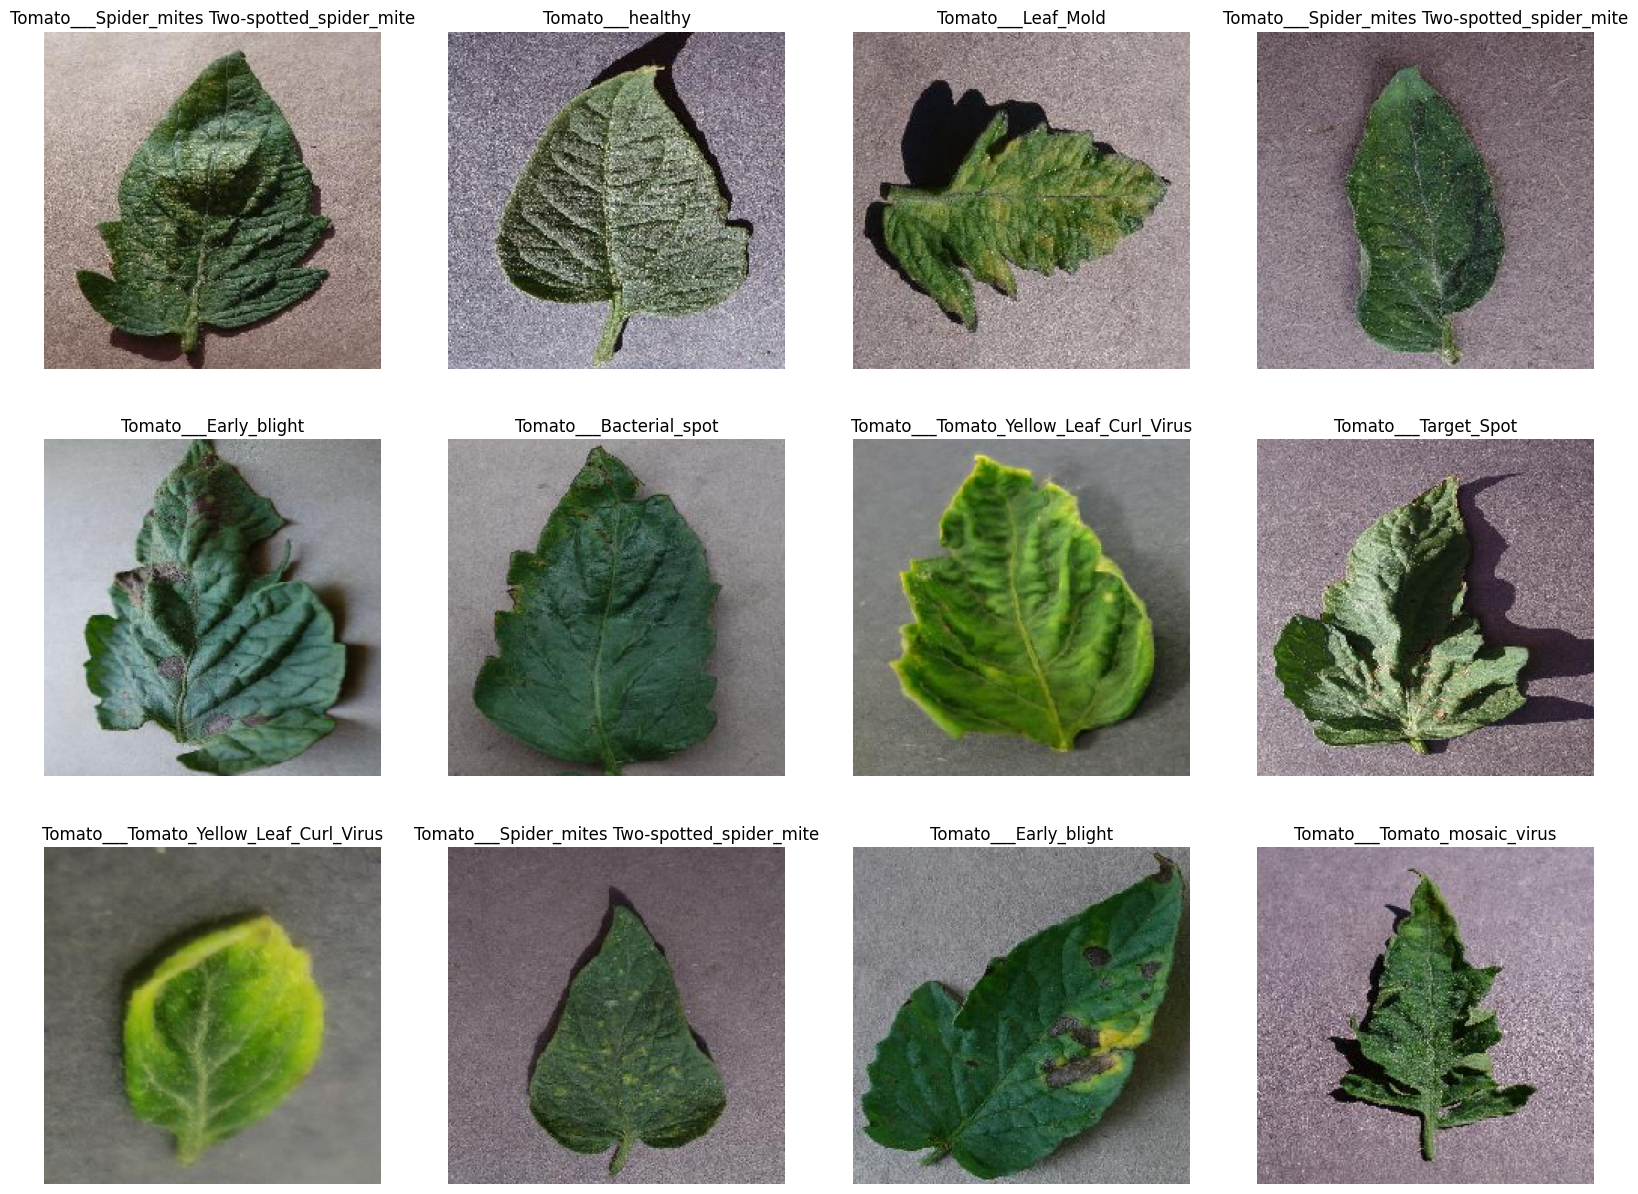

In [ ]:
plot_images(train_ds, class_names)

In [ ]:
def get_model():

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layers in base_model.layers:
        layers.trainable = False

    base_model_output = base_model.output

    x = Flatten()(base_model_output)
    x = Dense(512, activation='relu')(x)
    x = Dense(len(class_names), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [ ]:
model = get_model()

model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=10,    #actual code mn 10 hn
                   steps_per_epoch=len(train_ds),
                   validation_steps=len(val_ds),
                   callbacks=[ES(monitor="val_loss", patience=5)])

Epoch 1/10
250/250 [==============================] - 2680s 11s/step - loss: 1.6199 - accuracy: 0.5270 - val_loss: 0.8358 - val_accuracy: 0.7035
Epoch 2/10
250/250 [==============================] - 1336s 5s/step - loss: 0.6969 - accuracy: 0.7590 - val_loss: 0.6871 - val_accuracy: 0.7655
Epoch 3/10
250/250 [==============================] - 1325s 5s/step - loss: 0.4706 - accuracy: 0.8384 - val_loss: 0.6432 - val_accuracy: 0.7930
Epoch 4/10
250/250 [==============================] - 1336s 5s/step - loss: 0.3361 - accuracy: 0.8855 - val_loss: 0.5021 - val_accuracy: 0.8330
Epoch 5/10
250/250 [==============================] - 1330s 5s/step - loss: 0.2509 - accuracy: 0.9174 - val_loss: 0.4920 - val_accuracy: 0.8380
Epoch 6/10
250/250 [==============================] - 1315s 5s/step - loss: 0.1542 - accuracy: 0.9488 - val_loss: 0.4611 - val_accuracy: 0.8470
Epoch 7/10
250/250 [==============================] - 1312s 5s/step - loss: 0.0970 - accuracy: 0.9760 - val_loss: 0.3936 - val_accuracy

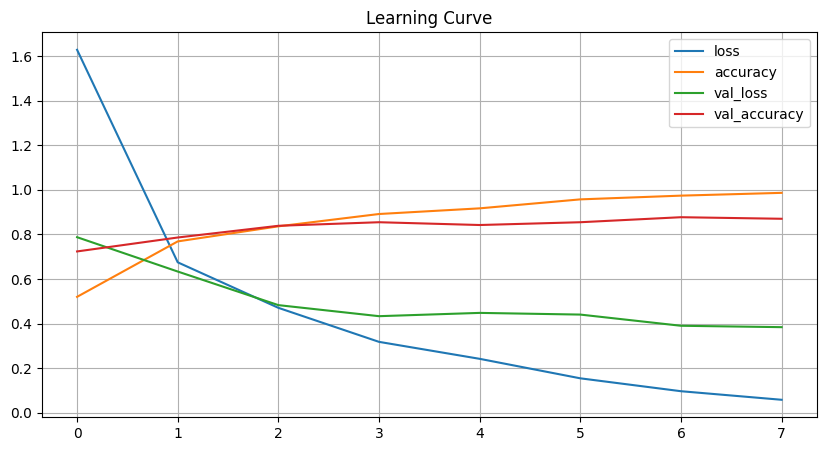

In [ ]:
learningcurve = pd.DataFrame(history.history)
learningcurve.plot(figsize=(10, 5))
plt.title("Learning Curve")
plt.grid()

In [ ]:
def predictImages(data, class_names, model):

    r, c = 3, 4
    imgLen = r*c
    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):

        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)

        plt.subplot(r, c, i)
        plt.imshow(img[0])

        predicted = model.predict(img)
        predicted = class_names[np.argmax(predicted)]
        actual = class_names[np.argmax(labels[id])]

        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis('off')
        cls()

        i+=1
        if i > imgLen:
            break

    plt.show()

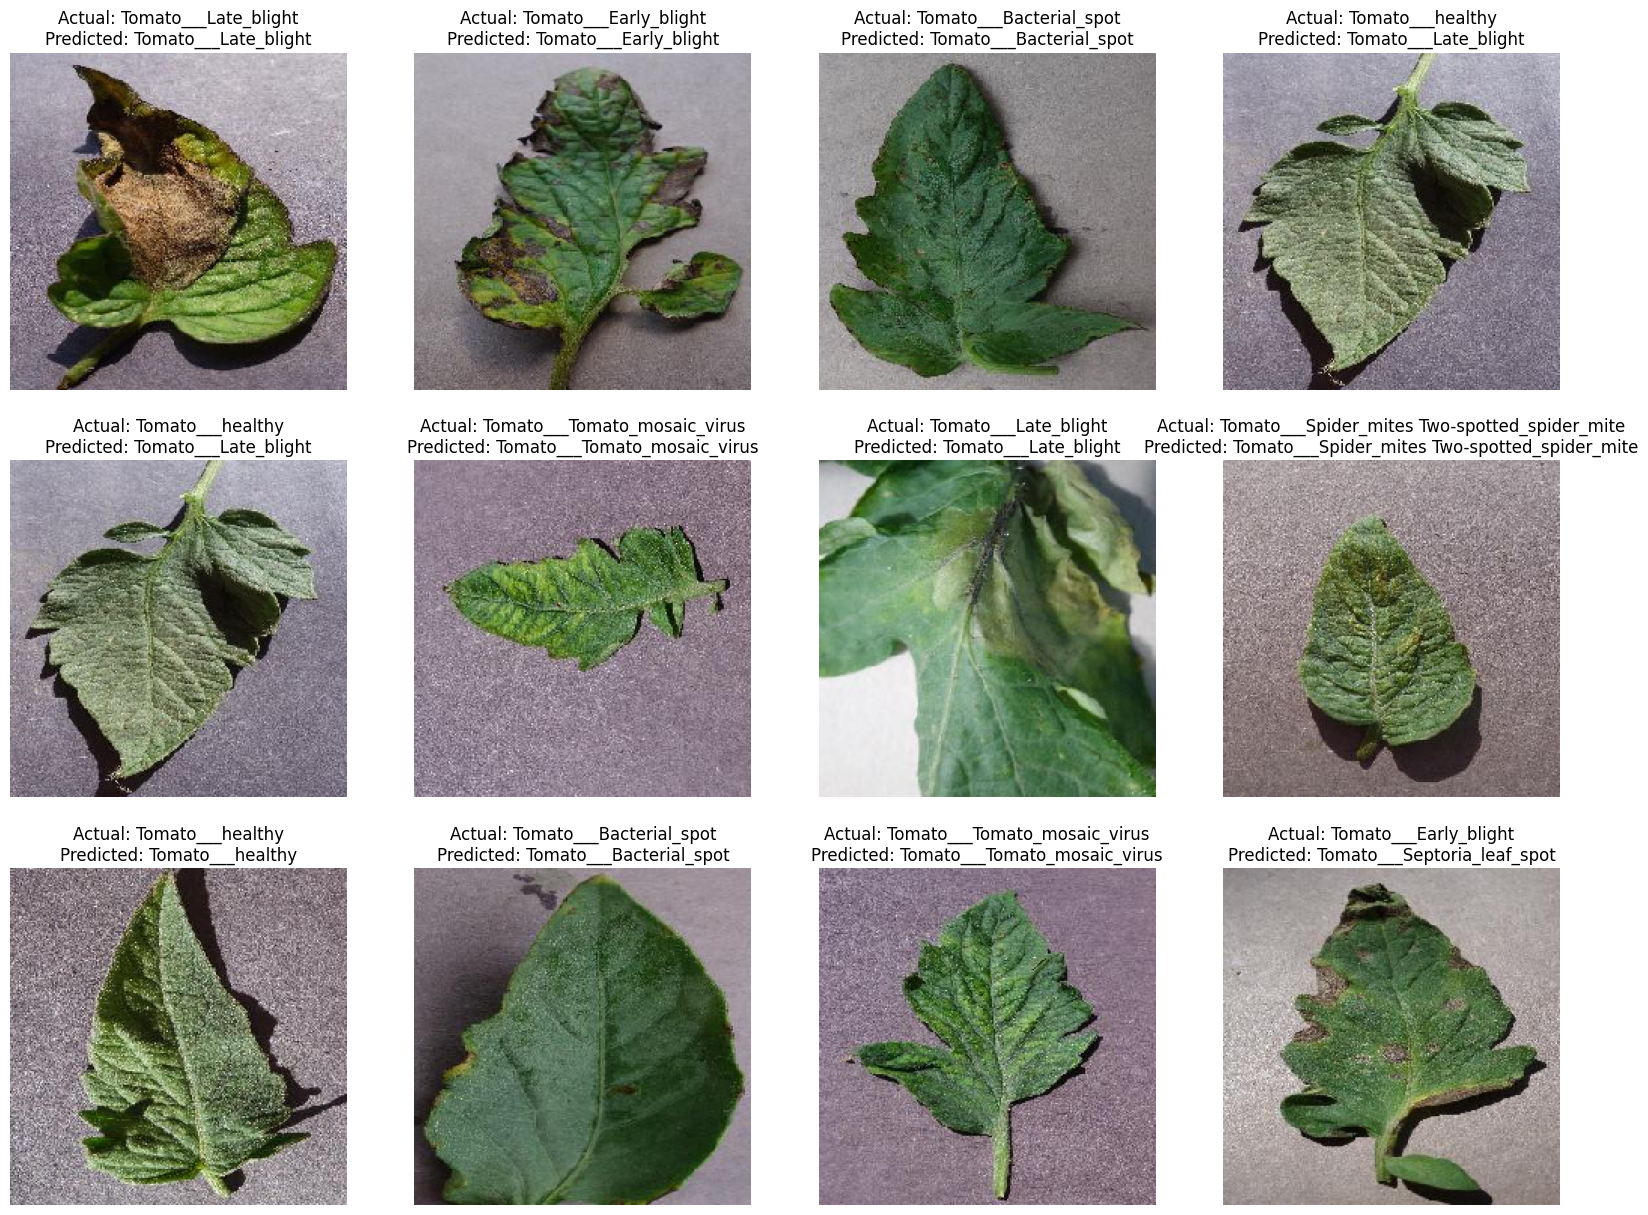

In [ ]:
predictImages(test_ds, class_names, model)